<a href="https://colab.research.google.com/github/SergioPGJunior/StarWars-wordcloud/blob/master/episodeiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
with open("/content/drive/My Drive/legendas star wars/StarWarsEpisodeIV.srt","r") as file:
  legendas = file.read()

In [44]:
import re

numbers = re.findall(r'\d{1,}', legendas)
print(len(numbers))
numbers = set(numbers)
print(len(numbers))
print(numbers)

12436
1478
{'788', '536', '026', '807', '1079', '196', '75', '636', '340', '1287', '1102', '1284', '349', '1000', '1192', '1171', '76', '799', '1324', '04', '849', '1216', '812', '137', '415', '989', '112', '45', '042', '4', '503', '031', '1218', '362', '313', '800', '904', '412', '1220', '234', '825', '627', '1209', '1263', '501', '563', '079', '402', '447', '887', '1105', '1137', '434', '231', '301', '742', '61', '065', '1134', '765', '177', '048', '411', '297', '310', '810', '159', '872', '001', '099', '1237', '702', '896', '067', '1240', '686', '908', '658', '452', '172', '836', '821', '312', '351', '741', '618', '1304', '1068', '124', '1036', '664', '1217', '1278', '106', '170', '1172', '020', '573', '1139', '293', '726', '1306', '1152', '1333', '955', '471', '1354', '1361', '350', '781', '633', '136', '952', '1249', '1073', '1184', '1265', '1065', '53', '420', '840', '507', '119', '272', '082', '1262', '156', '508', '359', '653', '1356', '841', '1335', '854', '883', '279', '1344'

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

#Divide strings em lista de palavras baseadas em um padrão específico utilizando Regexp
tokenizer = RegexpTokenizer(r'\w+')

l = tokenizer.tokenize(legendas.lower())
palavras = [w for w in l if w not in numbers]

In [48]:
len(palavras)

10831

In [49]:
nltk.download('stopwords')

words = [w for w in palavras if w not in stopwords.words('english')]
len(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4717

In [51]:
from nltk.probability import FreqDist

fdist = FreqDist(words)

fdist.pprint()

FreqDist({'get': 58, 'luke': 54, 'right': 52, 'sir': 46, 'one': 45, 'come': 41, 'think': 40, 'see': 36, 'us': 36, 'go': 34, ...})


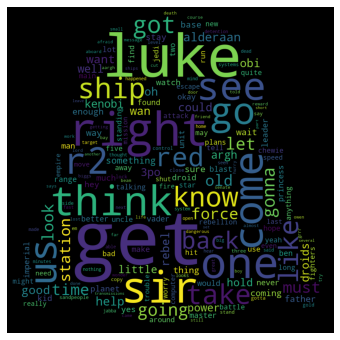

In [60]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np

# lista de stopword
stopwords = set(STOPWORDS)


mask = np.array(Image.open("/content/drive/My Drive/Placa-Gigante-Mdf-Star-Wars-Darth-Vader.jpg"))

# gerar uma wordcloud
wordcloud = WordCloud(mask=mask, stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate_from_frequencies(fdist)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("episodeIV.png")